In [1]:
!pip list


Package                       Version
----------------------------- -------------
absl-py                       1.4.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
albumentations                0.4.5
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.4
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens   

In [2]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)



TensorFlow version: 2.15.0


In [3]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt
import numpy as np

In [4]:
ds = tfds.load('fashion_mnist', split="train")

In [5]:
np.squeeze(ds.as_numpy_iterator().next()["image"]).shape

2024-04-06 18:30:58.134437: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


(28, 28)

In [6]:
dataiterator = ds.as_numpy_iterator()

In [7]:
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

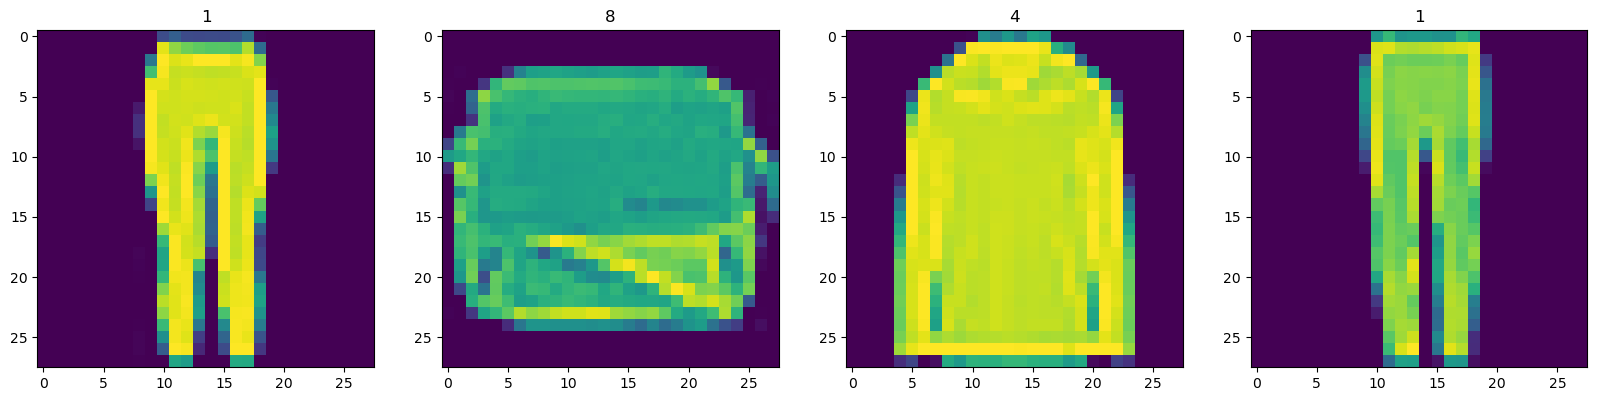

In [8]:
fig , ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    batch = dataiterator.next()
    ax[idx].imshow(np.squeeze(batch["image"]))
    ax[idx].title.set_text(batch["label"])

In [9]:
#scale image
def scale_images(data):
    image = data["image"]
    return image/255

map
cache
shuffle
batch
prefetch

In [10]:
ds= tfds.load("fashion_mnist",split= "train")
# running the dataset through the scale_image preprocessing step
ds = ds.map(scale_images)
# cache the dataset for the batch
ds = ds.cache()
# shuffle it up
ds = ds.shuffle(60000)
# batch into 128 images per sample
ds= ds.batch(128)
# reduces the likelihood of bottlenecking 
ds = ds.prefetch(64)

In [11]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# Neural Network

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , Flatten ,Reshape , LeakyReLU, Dropout , UpSampling2D

In [13]:
def build_generator():
    model= Sequential()
    
    #block1 takes in random values and reshape it into 7x7x128
    model.add(Dense(7*7*128 , input_dim = 128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    
    #upsampling block 1
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding="same"))
    model.add(LeakyReLU(0.2))
    
    #upsampling block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding="same"))
    model.add(LeakyReLU(0.2))
    
    # down sampling block 1
    model.add(Conv2D(128,4,padding="same"))
    model.add(LeakyReLU(0.2))
    
    # down sampling block 2
    model.add(Conv2D(128,4,padding="same"))
    model.add(LeakyReLU(0.2))
    
    #Conv Layer to get to one Channel
    model.add(Conv2D(1,4,padding="same", activation='sigmoid'))
    
    
    
    return model

In [14]:
generator = build_generator()
generator.summary()

/Users/veerajtalasani/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6272)              │    809,088 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 6272)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 128)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 128)       │    409,728 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 14, 14, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 128)       │    409,728 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 28, 28, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)       │    262,272 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 28, 28, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)       │    262,272 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 28, 28, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)         │      2,049 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
img=generator.predict(np.random.randn(4,128,1))
img.shape


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


(4, 28, 28, 1)

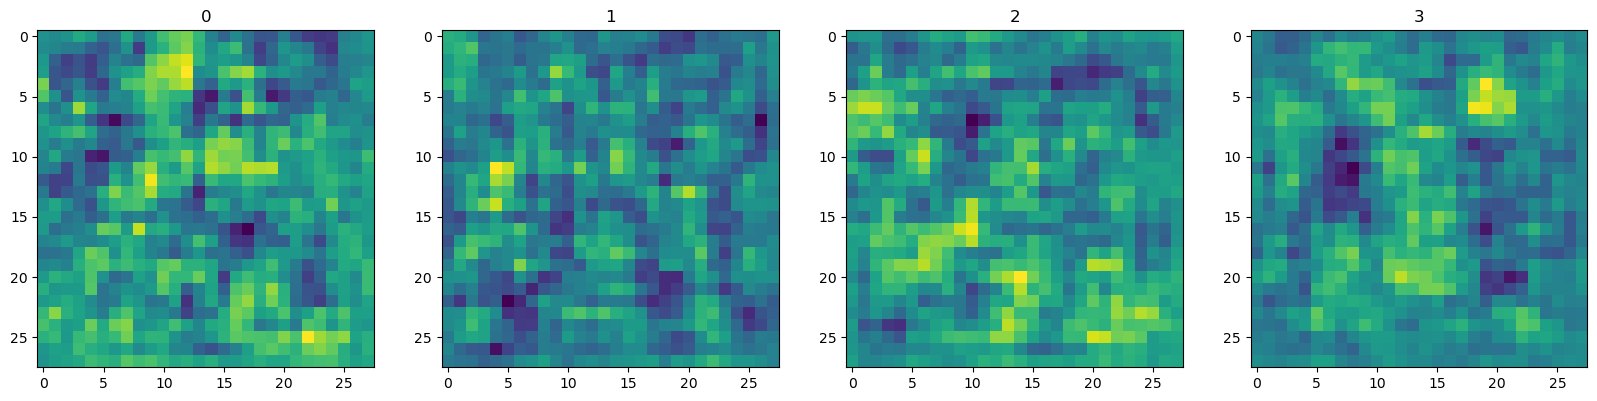

In [16]:
fig , ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in   enumerate(img):
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)

In [ ]:
# BUILD DISCRIMINATOR

In [17]:
def build_discriminator():
    model = Sequential()

    #first conv Block
    model.add(Conv2D(32,5,input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    #second conv Block
    model.add(Conv2D(64,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # third conv Block
    model.add(Conv2D(128,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # fourth conv Block
    model.add(Conv2D(256,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    #flatten then pass to dense Layer

    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))



    return model

In [18]:
discriminator= build_discriminator()
discriminator.summary()

/Users/veerajtalasani/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 32)        │        832 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 24, 24, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_6 (Conv2D)               │ (None, 20, 20, 64)        │     51,264 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 20, 20, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 20, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 128)       │    204,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 16, 16, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 256)       │    819,456 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 12, 12, 256)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 256)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 36864)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_4 (Dropout)             │ (None, 36864)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 1)                 │     36,865 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
discriminator.predict(np.expand_dims(img,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step


array([[0.4991441]], dtype=float32)

# Construct Training Loop

setup Losses and Optimizers

In [20]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [21]:
g_opt= Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss= BinaryCrossentropy()
d_loss = BinaryCrossentropy()

Build Subclassed Model

In [22]:
# Import the base model class to subclass our training steps
from tensorflow.keras.models import Model 

In [23]:
class FashionGAN(Model):
    def __init__(self, generator,discriminator , *args,**kwargs):
        # pass through args and kwards to base class
        super().__init__(*args, **kwargs)

        #create attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator


    def compile(self, g_opt,d_opt,g_loss,d_loss,*args, **kwargs):

        super().compile(*args, **kwargs)
        self.g_opt= g_opt
        self.d_opt= d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):

        #get the real data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128,128,1)), training=False)

        #train the discriminator
        with tf.GradientTape() as d_tape:

            #pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training= True)
            yhat_fake= self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real,yhat_fake],axis=0)

            #create Labels for real and fake images
            y_realfake = tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)], axis=0)

            # Add some noise to the true outputs
            noise_real= 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake= -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real,noise_fake],axis=0)


            # Calculate loss

            total_d_loss= self.d_loss(y_realfake,yhat_realfake)

        # Apply backpropagation  -nn learn
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        #train the generator
        with tf.GradientTape() as g_tape:
            #generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training= True)
            #create the predicted labels
            predected_labels = self.discriminator(gen_images,training= False)
            #calculate loss -trick to training to fake out the discriminator
            total_g_loss= self.g_loss(tf.zeros_like(predected_labels), predected_labels)
        #apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(ggrad, self.discriminator.trainable_variables))

        return {"d_loss": total_d_loss , "g_loss":total_g_loss}



        

In [24]:
#create instance of subclassed model

fashgan = FashionGAN(generator , discriminator)

In [25]:
#compile the model 
fashgan.compile(g_opt,d_opt,g_loss,d_loss)

Build Callback


In [26]:
import os 
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [27]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3 , latent_dim =128):
        self.num_img = num_img
        self.latent_dim = latent_dim
    
    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img,self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img= array_to_img(generated_images[i])
            img.save(os.path.join('images', f"generated_img_{epoch}_{i}.png"))
          

In [28]:
monitor = ModelMonitor()

# Train


In [33]:
import sys

import keras
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")

print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")


Python Platform: macOS-14.5-arm64-arm-64bit
Tensor Flow Version: 2.15.0
Keras Version: 3.0.0
Python 3.11.5 (main, Sep 11 2023, 08:17:37) [Clang 14.0.6 ]
Pandas 2.0.3
Scikit-Learn 1.3.0
SciPy 1.11.1
GPU is available


In [69]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Run on GPU if available
with tf.device('/GPU:0'):
    # Your model training code here
    hist = fashgan.fit(ds, epochs=2000, callbacks=[ModelMonitor()])

Num GPUs Available:  1
Epoch 1/2000
469/469 ━━━━━━━━━━━━━━━━━━━━ 308s 656ms/step - d_loss: 0.2697 - g_loss: 1.3935e-05 - loss: 0.0000e+00
Epoch 2/2000
106/469 ━━━━━━━━━━━━━━━━━━━━ 5:35 925ms/step - d_loss: 0.2697 - g_loss: 1.3610e-05

KeyboardInterrupt: 

In [37]:
plt.suptitle('Loss')
plt.plot(hist.history["d_loss"],label="d_loss")
plt.plot(hist.history["g_loss"],label="g_loss")
plt.legend()
plt.show()

KeyError: 'd_loss'

<Figure size 640x480 with 0 Axes>

In [80]:
imgs = generator.predict(tf.random.normal((16,128,1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


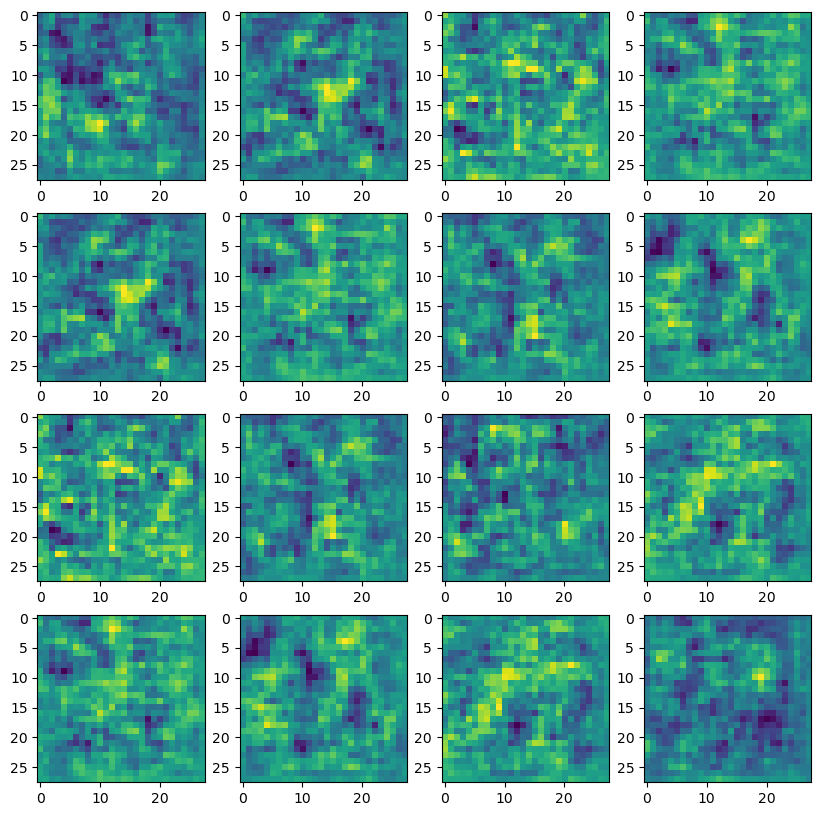

In [74]:
fig,ax = plt.subplots(ncols=4,nrows=4, figsize=(10,10))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [81]:
imgs


array([[[[0.495122  ],
         [0.5006405 ],
         [0.5060852 ],
         ...,
         [0.4912856 ],
         [0.4951782 ],
         [0.5006626 ]],

        [[0.49735108],
         [0.5016964 ],
         [0.5051473 ],
         ...,
         [0.4933817 ],
         [0.49759573],
         [0.5008935 ]],

        [[0.4932196 ],
         [0.5012177 ],
         [0.49975085],
         ...,
         [0.49456128],
         [0.49952623],
         [0.5009335 ]],

        ...,

        [[0.49586308],
         [0.49957168],
         [0.5005623 ],
         ...,
         [0.500465  ],
         [0.5027818 ],
         [0.5032841 ]],

        [[0.49893528],
         [0.49913597],
         [0.50048375],
         ...,
         [0.49998736],
         [0.50194174],
         [0.5021902 ]],

        [[0.5005518 ],
         [0.49964377],
         [0.5004312 ],
         ...,
         [0.49996376],
         [0.50219834],
         [0.5002678 ]]],


       [[[0.50978816],
         [0.5000465 ],
         [0.50